#SnS assignment 2- B19ME039

The Original image with dimension (1080, 1920)


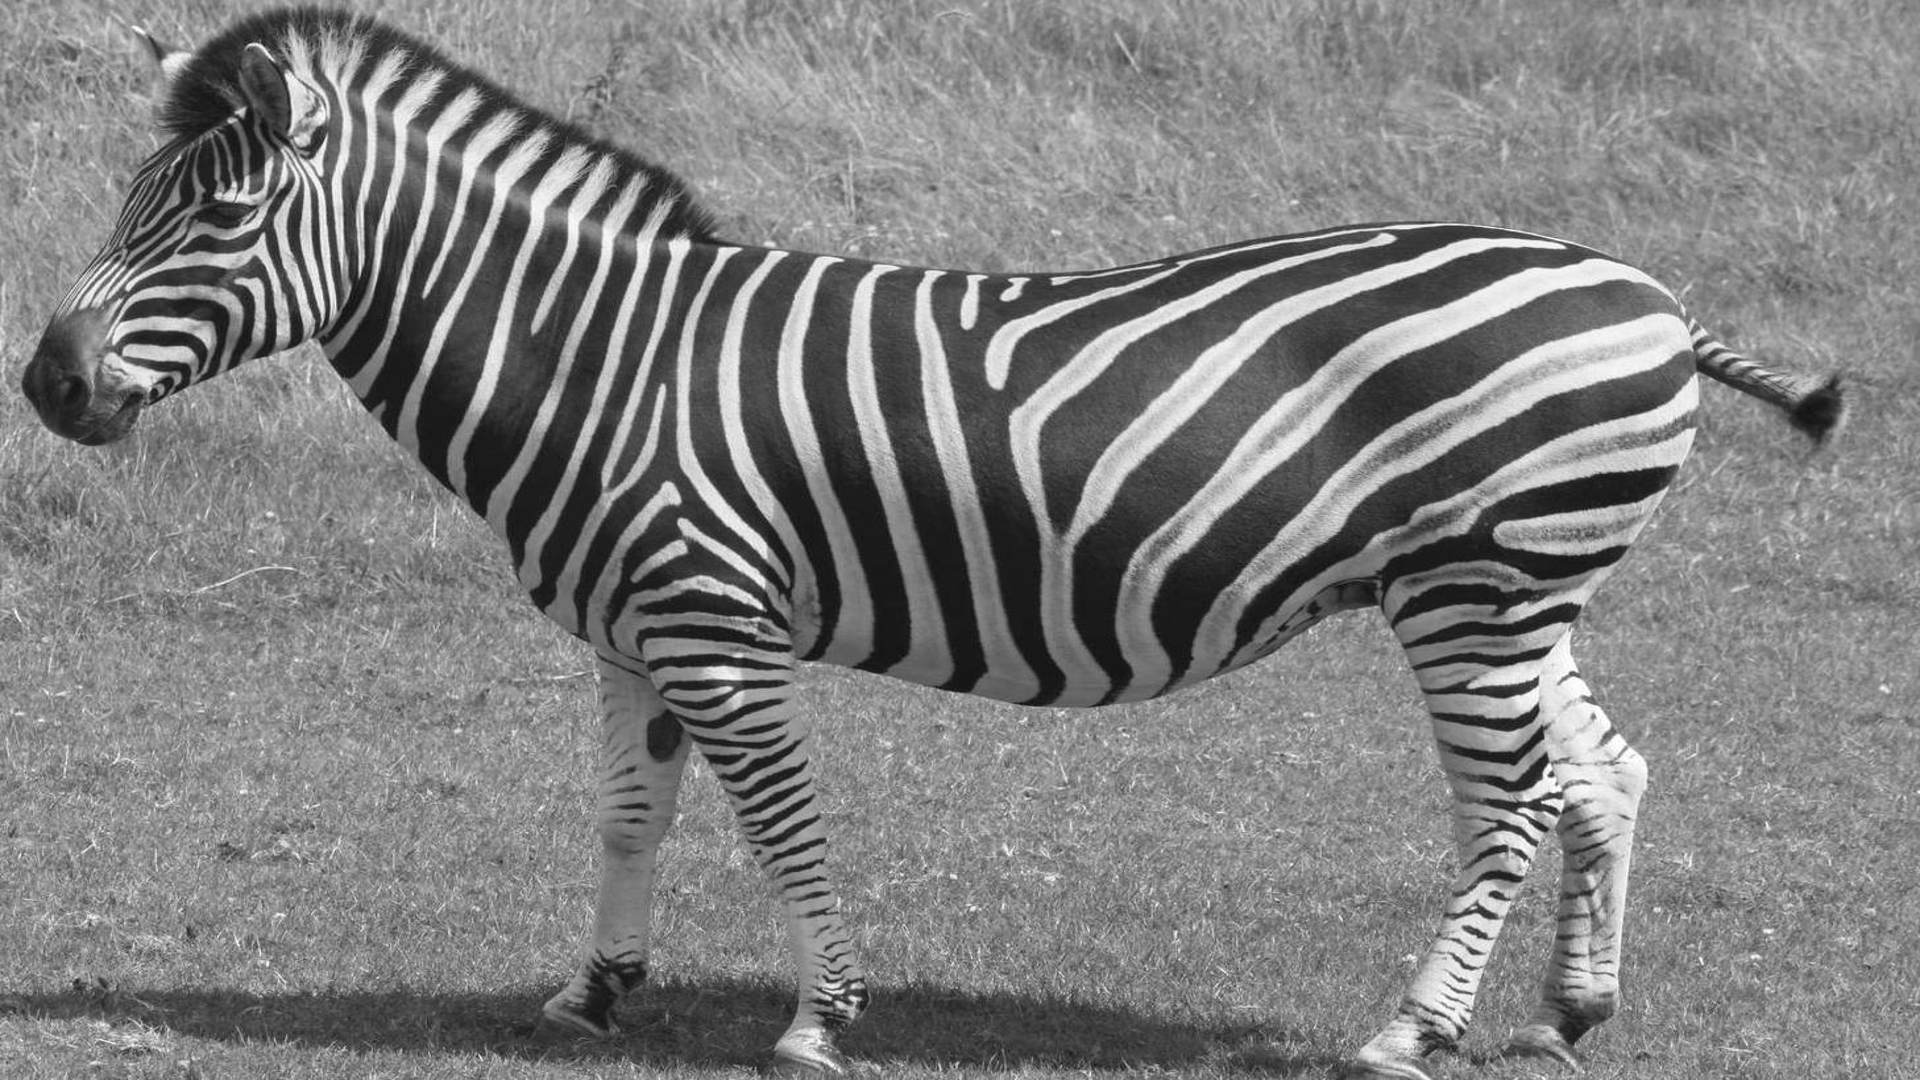

In [ ]:
# Part 1:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

f = cv2.imread("/content/Kshitij Singh (B19ME039) - f.png")  # reading the image from the file
f = f[:,:,0]  # removing the rgb dimension as the image is grayscale with or without it 
print("The Original image with dimension", f.shape)
cv2_imshow(f)  # plotting the original image

The downsampled image having dimension (540, 960)


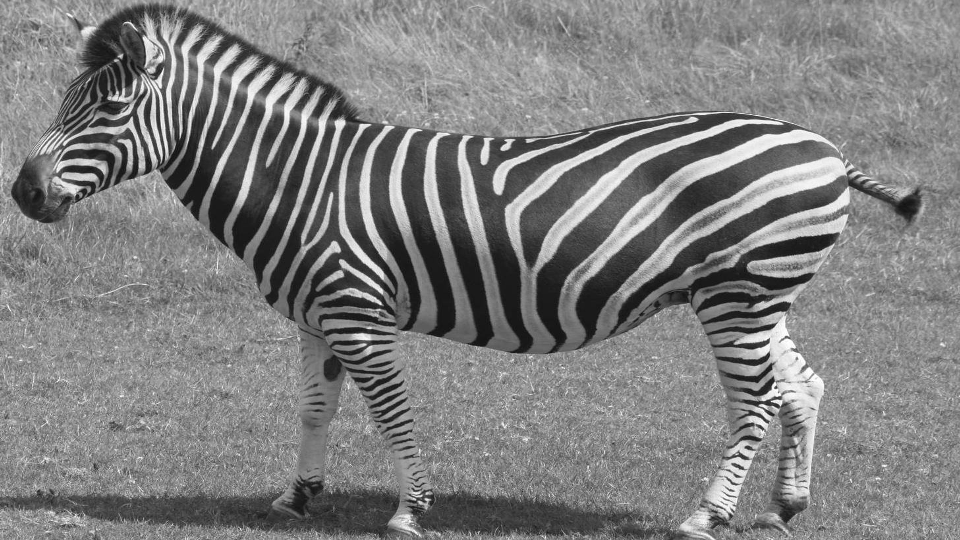

None


In [ ]:
g = f.copy() # now creating the downsampled image array g 
g = np.delete(g, list(range(1, 1920, 2)), axis=1)  # downsampling by deleting alternate values in the array
g = np.delete(g, list(range(1, 1080, 2)), axis=0)   
print("The downsampled image having dimension", g.shape)
print(cv2_imshow(g))  # plotting the downsampled image

The upsampled image having dimensions (1080, 1920)


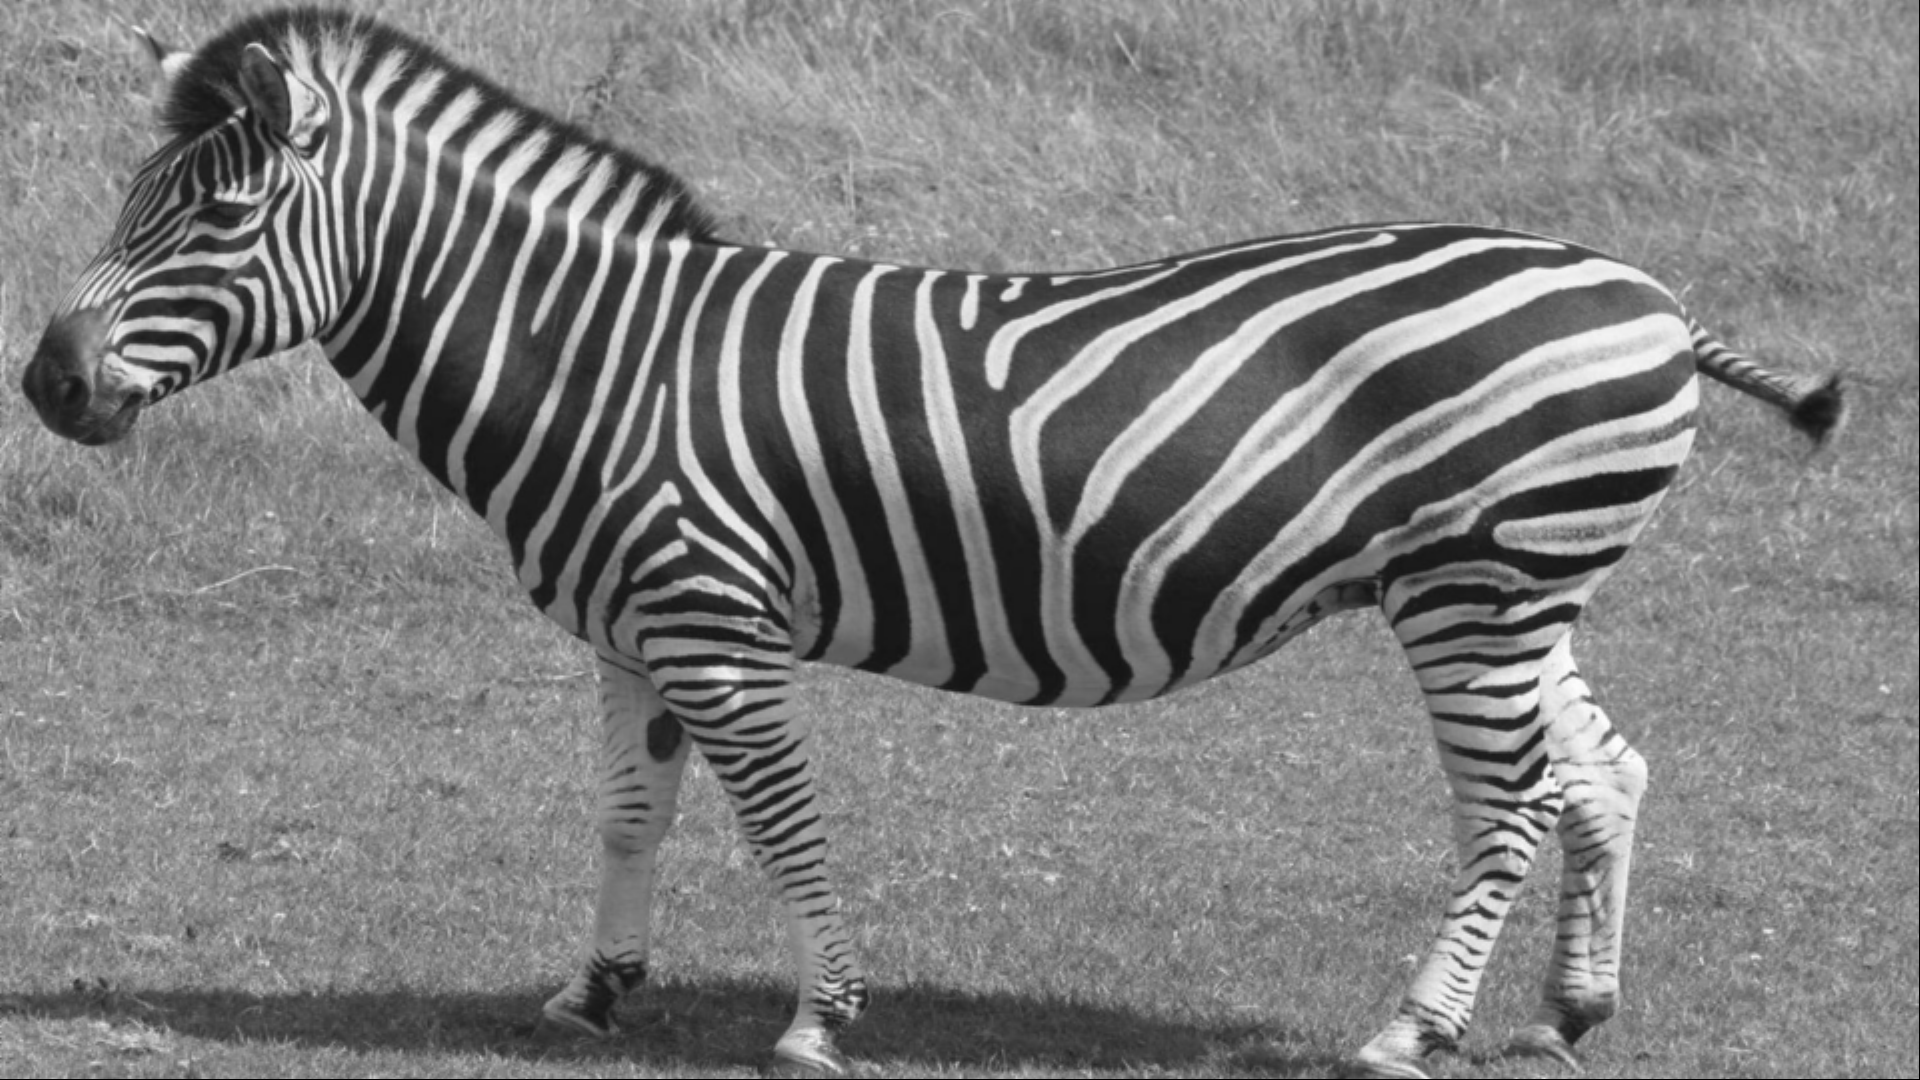

In [ ]:
g_u = np.zeros((1080,1920))  # initiating the upsampled image array with zeros  

for i in range(0,1080,2):      # filling this new array at alternate positions with downsampled image array values first
  for j in range(0,1920,2):
    g_u[i,j] = g[int(i/2),int(j/2)]
    
for i in range(1,1079,2):      # now filling the in between locations having zeros with average of the 2 values on either side (linear interpolation)
  g_u[i,:] = g_u[i-1,:]/2 + g_u[i+1,:]/2  # here row-wise linear interpolation

for i in range(1,1919,2):      # linear interpolation applied to column
  g_u[:,i] = g_u[:,i-1]/2 + g_u[:,i+1]/2

print("The upsampled image having dimensions", g_u.shape)
cv2_imshow(g_u)                # plotting the upsampled image 

Image showing the visual difference between the normal image(f) and the upsampled image(g_u):


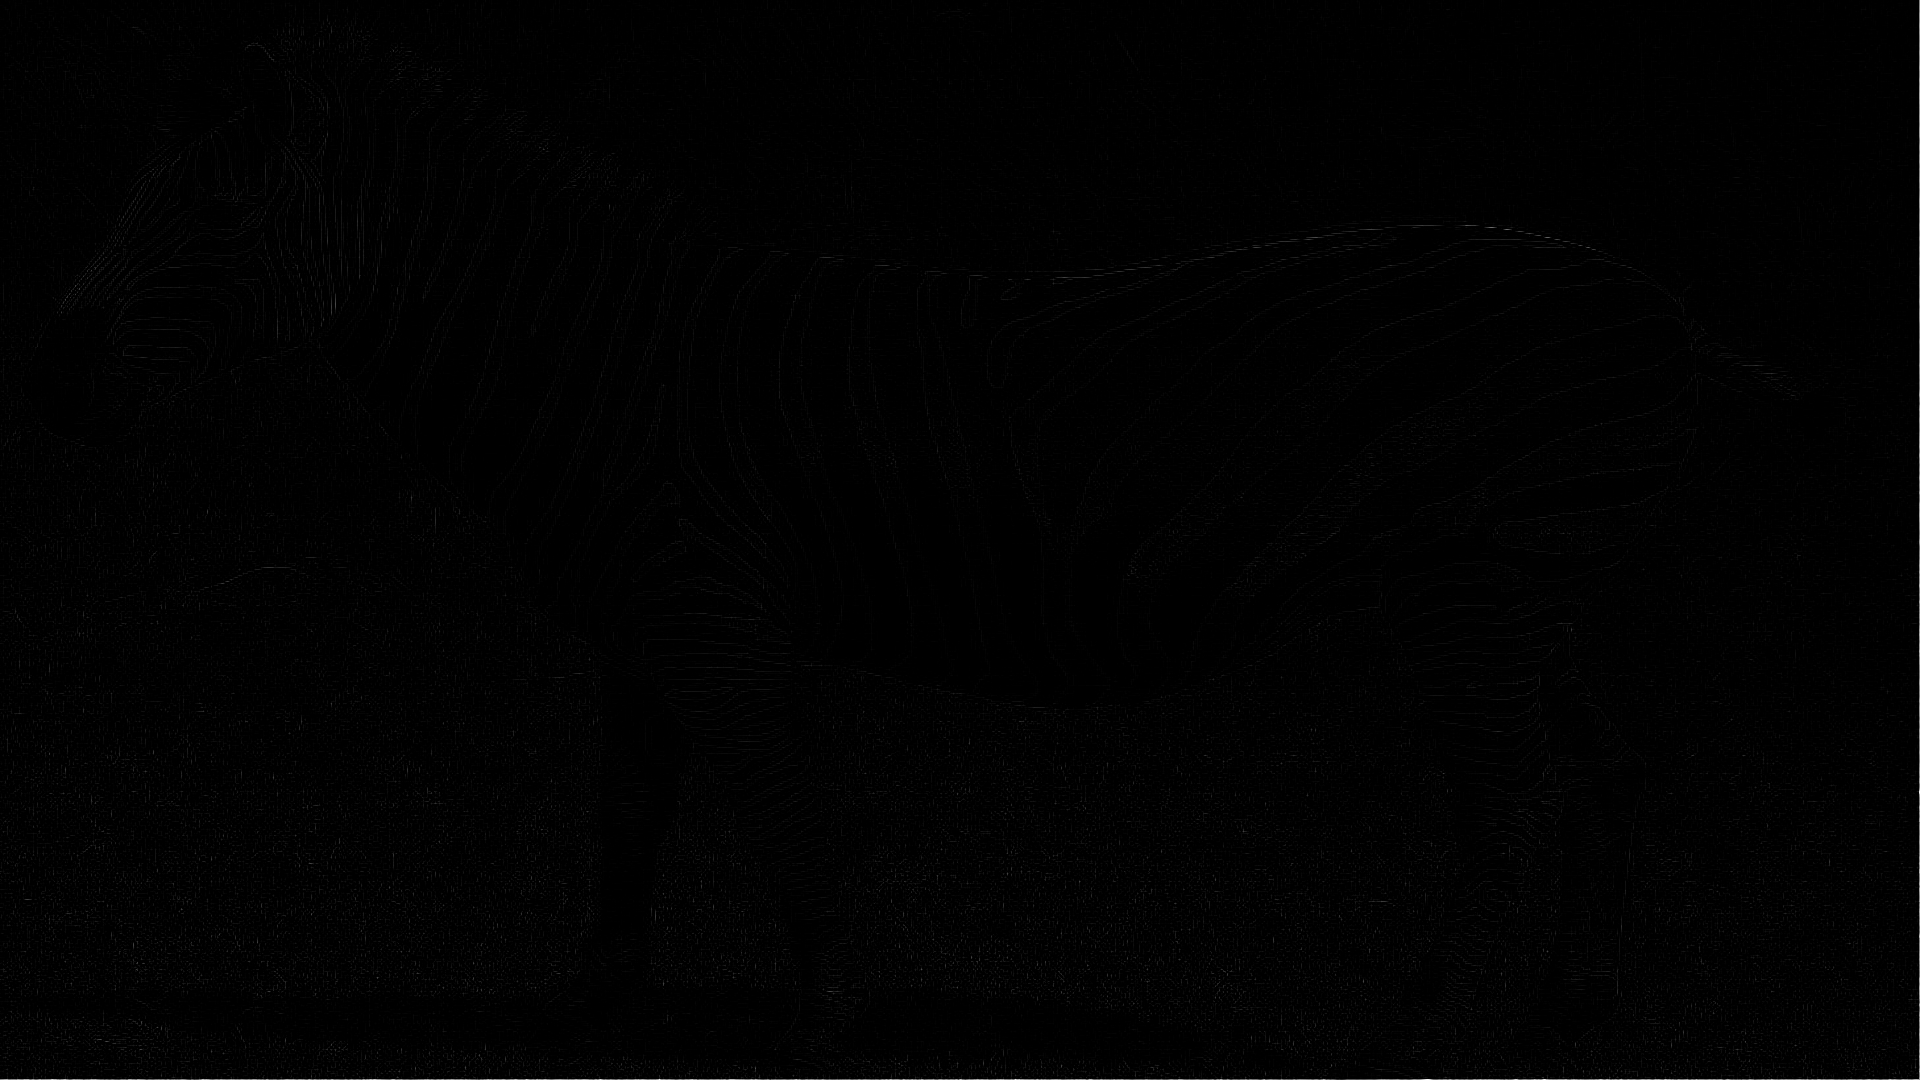

In [ ]:
print("Image showing the visual difference between the normal image(f) and the upsampled image(g_u):")
cv2_imshow(f-g_u) # subtracting the original image from the upsampled image to find the differences

Downsampled image with dimesions (540, 960)


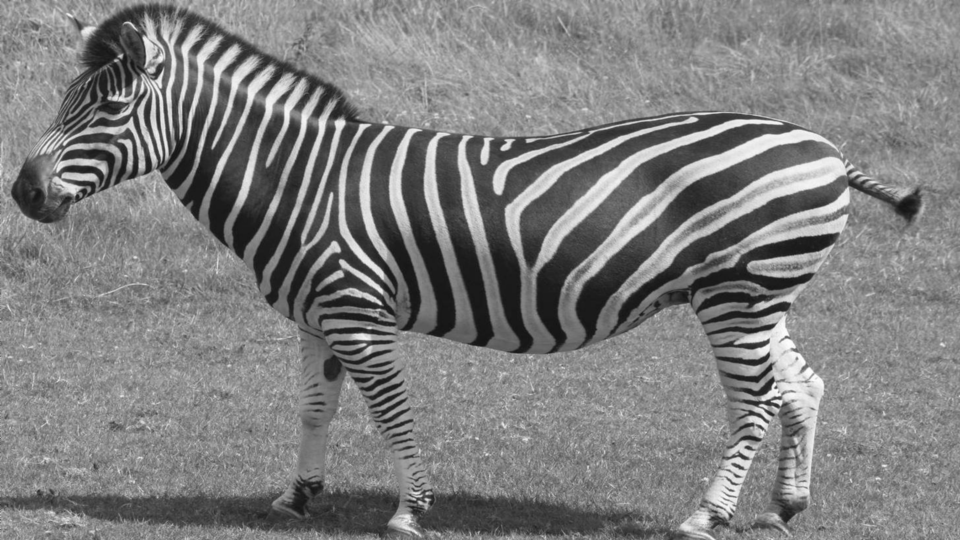

None


In [ ]:
# Task 2
f_m = f.copy()

for i in range(1,1079):                            # applying a 3x3 moving average filter on f to obtain f_m
  for j in range(1,1919):
    f_m[i,j] = f[i-1,j-1]/9 + f[i-1,j]/9 + f[i-1,j+1]/9 + f[i,j-1]/9 + f[i,j]/9 + f[i,j+1]/9 + f[i+1,j-1]/9 + f[i+1,j]/9 + f[i+1,j+1]/9

g = f_m.copy()                                     # initiating the downsampled image array
g = np.delete(g, list(range(1, 1920, 2)), axis=1)  # deleting alternate entries for downsampling
g = np.delete(g, list(range(1, 1080, 2)), axis=0)
print("Downsampled image with dimesions", g.shape)
print(cv2_imshow(g))                               # plotting the downsampled image of task 2

The upsampled image in task 2 having dimensions (1080, 1920)


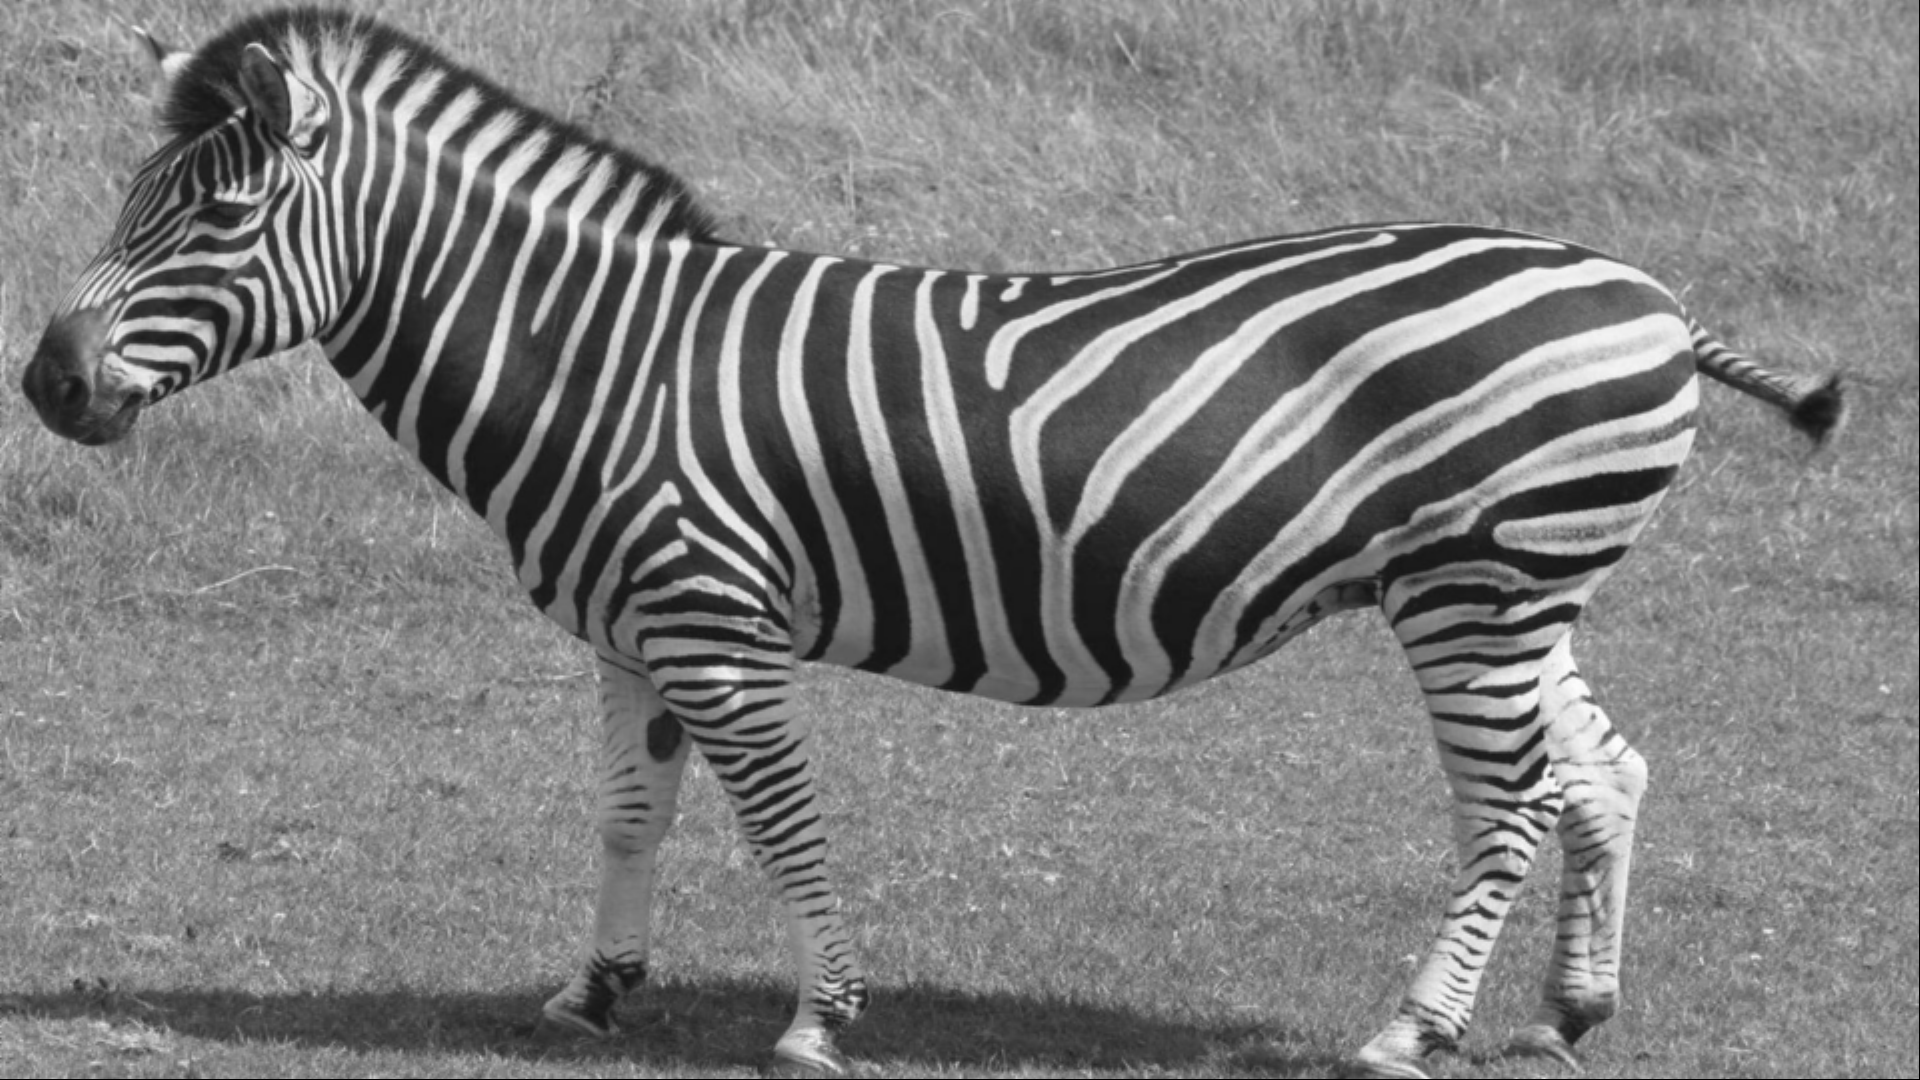

In [ ]:
g_um = np.zeros((1080,1920)) # initiating the upsampled image array in task 2

for i in range(0,1080,2):      # filling the upsampled image array with the downsampled values first at alternate locations
  for j in range(0,1920,2):
    g_um[i,j] = g[int(i/2),int(j/2)]
    
for i in range(1,1079,2):      # now interpolating and filling the values in between the values from downsampled array values
  g_um[i,:] = g_um[i-1,:]/2 + g_um[i+1,:]/2  

for i in range(1,1919,2):      # interpolating column-wise also excluding the edge values in the array
  g_um[:,i] = g_um[:,i-1]/2 + g_um[:,i+1]/2

print("The upsampled image in task 2 having dimensions", g_um.shape)
cv2_imshow(g_um)

Image showing the visual difference between the normal image(f_m) and the upsampled image(g_u):


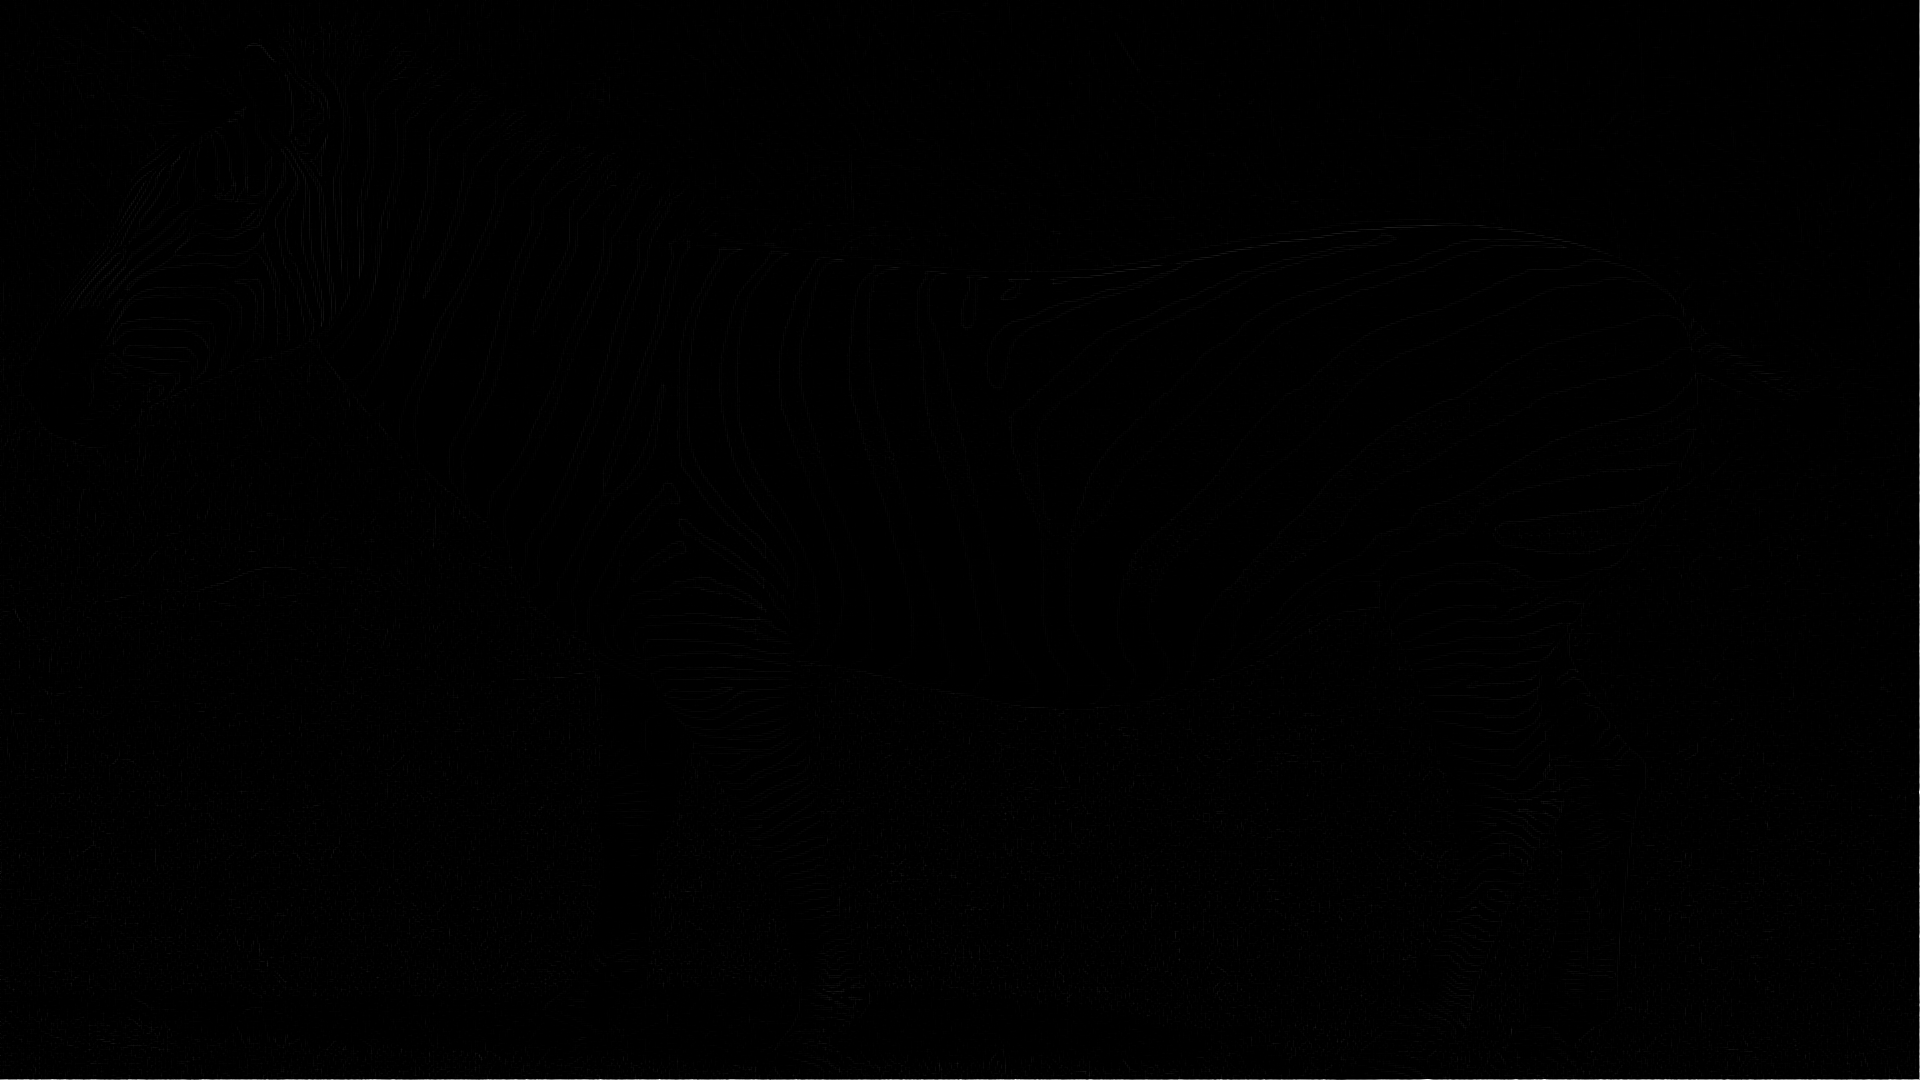

In [ ]:
print("Image showing the visual difference between the normal image(f_m) and the upsampled image(g_u):")
cv2_imshow(f_m-g_um)  # plotting the image showing the difference between f_m and g_um

So from the difference images between the normal images(f in task 1 and f_m in task 2) and the upsampled images(g_u in task 1 and g_um in task 2), we can clearly see that the upsampled image in task 2 is better as in the image showing the difference between f_m (the normal image obtained after applying a moving average filter) and g_um (the upsampled image in task 2) has very less amount of grey/white lines/spots (which are nothing but the information/values that were lost/different after the downsampling-upsampling process) compared to the image showing the difference obtained in the first task which had more of these white/grey lines.

In general, the answer will hold for any arbitrary image because in task 2, we applied a moving average filter which applied the average value of a 3x3 block of the 2D array of pixels in the image to the middle element of the 3x3 filter array. By doing this, we are giving the information of adjacent pixels around the center element which was otherwise lost when we carried out the process in task 1 where we were deleting every alternate element in the array after which we were just interpolating by taking the average of 2 adjacent entries in the pixel downsampled pixel array and inserting it between the two respective entries. Moving average filter is nothing but a low pass finite impulse response filter, and since a 3x3 filter is bigger than what we did in task 1 which was just taking the adjacent two entries and averaging them, so the smoothness of the output data increases and hence it better retains the original information.